In this notebook, we will implement a Convoulutional Neural Network (CNN) using pytorch for CIFAR-10 Classification.

Expectations: Please provide solutions to the questions in the cells at the end of the notebook.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import models,transforms
from torchvision.utils import make_grid
from torchvision.datasets import CIFAR10
from torch.utils.data.sampler import SubsetRandomSampler
#from torchsummary import summary
from torch.utils.data import Dataset, DataLoader

We will be using [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) datasets which is sub-dataset of CIFAR-100 Dataset. The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. <br>

Following are the classes in the dataset along with some random samples.

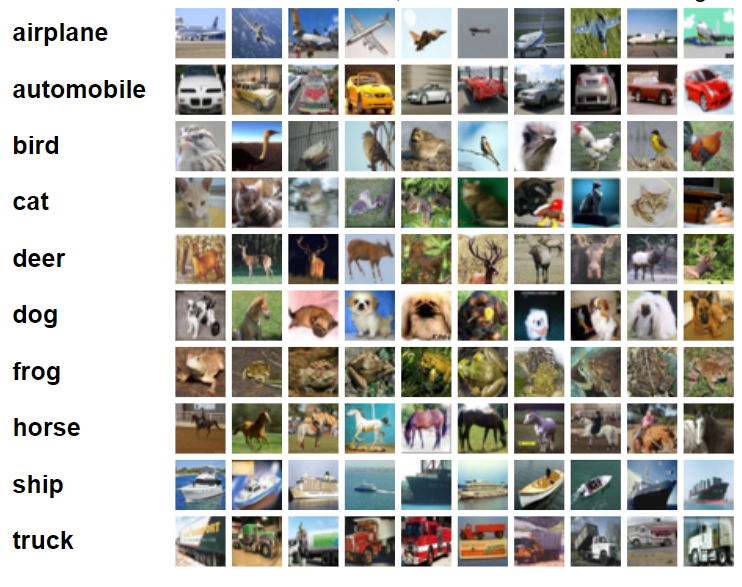

We will use pytorch datasets to fetch the CIFAR-10 dataset as it provides a handy way to get and use the dataset. More information about pytorch datasets [here](https://pytorch.org/vision/stable/datasets.html).

In [11]:
batch_sz=256 # this is batch size i.e. the number of rows in a batch of data

train_dataset = CIFAR10(root='./datasets', train=True, download=True, transform = transforms.ToTensor())
test_dataset = CIFAR10(root='./datasets', train=False, download=True, transform = transforms.ToTensor())

train_loader = DataLoader(train_dataset, batch_size = batch_sz)
test_loader = DataLoader(test_dataset, batch_size = batch_sz)

Files already downloaded and verified
Files already downloaded and verified


## Transfer Learning

Transfer learning means taking the relevant parts of a pre-trained machine learning model and applying it to a new but similar problem. Transfer learning brings a range of benefits to the development process of machine learning models. The main benefits of transfer learning include the saving of resources and improved efficiency when training new models. It can also help with training models when only unlabelled datasets are available, as the bulk of the model will be pre-trained.

![Transfer Learning](https://topb0ts.wpenginepowered.com/wp-content/uploads/2019/12/cover_transfer_learning_1600px_web.jpg) [Source](https://www.topbots.com/transfer-learning-in-nlp/)

# Q1: define a 2 layer simple NN for cifar10 classificaiton

In [12]:
#Q1: define a 2 layer simple NN for cifar10 classificaiton
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32*32*3, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = x.view(-1, 32*32*3)
        x1 = F.relu(self.fc1(x))
        x = self.fc2(x1)
        return x, x1



In [13]:
#Q2: Define a CNN with 2 conv layer and 2 linear layers for cifar10 classificaiton
class Two_layer_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,64,3,1)
        self.conv2 = nn.Conv2d(64,128,3,1)
        self.fc1 = nn.Linear(128*3*3,512) # 10 class in CIFAR-10
        self.fc2 = nn.Linear(512,10) # 10 class in CIFAR-10

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x1 = F.max_pool2d(x, (2,2))

        x = self.conv2(x1)
        x = torch.relu(x)
        x2 = F.max_pool2d(x, (4,4))

        # classification head
        x3 = x2.view(-1, 128*3*3)

        x = self.fc1(x3)
        x = torch.relu(x)
        x = self.fc2(x)
        x = torch.softmax(x, dim=1)

        return x, x1, x2, x3


# Q3: Train both networks for 10 epochs and compare their performance

In [14]:
if torch.cuda.is_available():
  device = torch.device("cuda:0")
else:
  device = torch.device("cpu")
print(device)

net1 = SimpleNN().to(device)

# setting hyper-parameters
lr = 1e-3
opt = optim.Adam(net1.parameters(), lr = lr)
# Scheduler = optim.lr_scheduler.ReduceLROnPlateau(opt, mode='min', factor=0.1, patience=2, verbose=True)
Scheduler = optim.lr_scheduler.StepLR(opt, step_size=1, gamma=0.1)
num_epochs = 10

cuda:0


Epoch:  0 Loss:  1.943288415670395 Time:  8.550570726394653
Epoch:  1 Loss:  1.7307966947555542 Time:  8.023430109024048
Epoch:  2 Loss:  1.656329685327958 Time:  6.925675630569458
Epoch:  3 Loss:  1.601824026326744 Time:  7.7754082679748535
Epoch:  4 Loss:  1.5581943709023145 Time:  6.983757257461548
Epoch:  5 Loss:  1.526619469024697 Time:  7.352319240570068
Epoch:  6 Loss:  1.4982944100486988 Time:  7.485743522644043
Epoch:  7 Loss:  1.4760930410453252 Time:  6.855320692062378
Epoch:  8 Loss:  1.4532939128729763 Time:  7.468071460723877
Epoch:  9 Loss:  1.4323556994905278 Time:  6.685579299926758


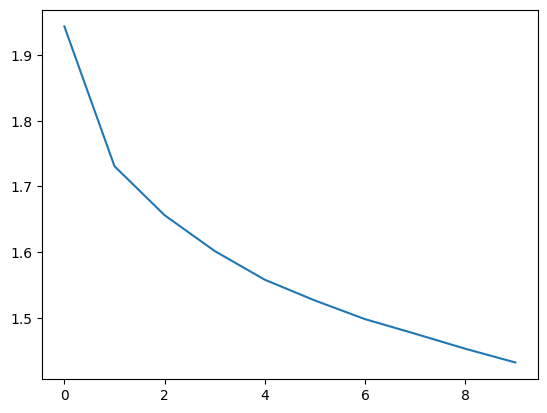

In [15]:
import time


ls = []
for i in range(num_epochs):
  total_loss = 0
  t=time.time()
  for batch in train_loader:

    X, Y = batch[0].to(device), batch[1].to(device)
    code = net1(X)[0]

    loss = F.cross_entropy(code, Y)
    opt.zero_grad()
    loss.backward()
    opt.step()
    total_loss+=loss.item()

  ls.append(total_loss/len(train_loader))
  print("Epoch: ", i, "Loss: ", total_loss/len(train_loader), "Time: ", time.time()-t)


plt.plot(ls)

In [ ]:
# net1 = net1.to("cpu")

In [19]:
if torch.cuda.is_available():
  device = torch.device("cuda:0")
else:
  device = torch.device("cpu")

net2 = Two_layer_CNN().to(device)

# setting hyper-parameters
lr = 1e-3
opt = optim.Adam(net2.parameters(), lr = lr)
# Scheduler = optim.lr_scheduler.ReduceLROnPlateau(opt, mode='min', factor=0.1, patience=2, verbose=True)
Scheduler = optim.lr_scheduler.StepLR(opt, step_size=1, gamma=0.01)
num_epochs = 10

Epoch:  0 Loss:  2.25376010792596 Time:  8.260085344314575
Epoch:  1 Loss:  2.1597356492159316 Time:  8.193007230758667
Epoch:  2 Loss:  2.120823466047949 Time:  8.581229448318481
Epoch:  3 Loss:  2.1064387426084403 Time:  8.36025071144104
Epoch:  4 Loss:  2.0962511398354353 Time:  7.955365180969238
Epoch:  5 Loss:  2.087741278872198 Time:  8.538991689682007
Epoch:  6 Loss:  2.0810029458026498 Time:  8.664878129959106
Epoch:  7 Loss:  2.075712297643934 Time:  8.334619522094727
Epoch:  8 Loss:  2.070992478302547 Time:  8.504095554351807
Epoch:  9 Loss:  2.0664717117134406 Time:  8.5009765625


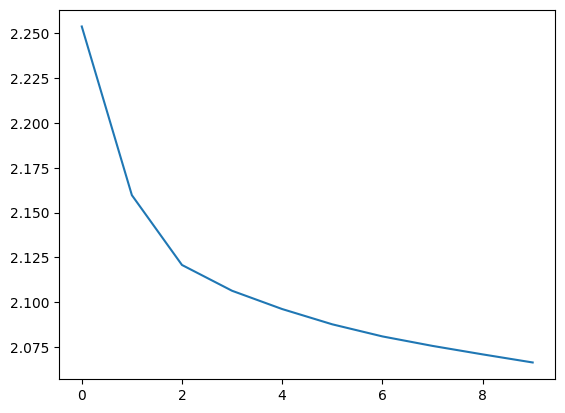

In [20]:
import time


ls = []
for i in range(num_epochs):
  total_loss = 0
  t=time.time()
  for batch in train_loader:

    X, Y = batch[0].to(device), batch[1].to(device)
    code = net2(X)[0]

    loss = F.cross_entropy(code, Y)
    opt.zero_grad()
    loss.backward()
    opt.step()
    total_loss+=loss.item()

  ls.append(total_loss/len(train_loader))
  print("Epoch: ", i, "Loss: ", total_loss/len(train_loader), "Time: ", time.time()-t)


plt.plot(ls)

In [ ]:
# net2 = net2.to("cpu")

# Q4: Compare the accuarcay of both networks on the test set

In [27]:
def fetch_img(idx, loader):
    # fetching image for confusion matrix visualization
    bidx = 0
    while idx > batch_sz:
        idx -= batch_sz
        bidx += 1
    for i, batch in enumerate(loader):
        if i == bidx:
            return batch[0][idx], batch[1][idx]
    print("Index out of range")
    print("Max index is: ", i, "input index is ", idx)
    return None, None

def predict(model, loader):
    # forwards the model and returns the prediction
    # also returns the code from the last layer (float)
    pred = []
    code = []
    for batch in loader:
        X, Y = batch[0].to(device), batch[1].to(device)
        out = model(X)[0]
        pred.append(torch.argmax(out, dim=1))
        code.append(out)
    return torch.cat(pred), torch.cat(code)

def draw_confusion_matrix(model, loader):
    from sklearn.metrics import confusion_matrix
    # draws confusion matrix for the model
    # loader is the test loader
    # model is the trained model
    # The function will draw a confusion matrix for the model, with ground truth on the left and predicted on the top.
    # Some sample images will also be shown for each class.
    pred, code = predict(model, loader)
    Y = []
    for batch in loader:
        Y.append(batch[1])
    Y = torch.cat(Y)
    Y = Y.cpu().numpy()
    pred = pred.cpu().numpy()
    print(pred.shape, Y.shape)
    table = np.hstack((Y.reshape(-1,1), pred.reshape(-1,1)))
    cm = confusion_matrix(Y, pred)
    fig, ax = plt.subplots(figsize=(10,10))
    ax.matshow(cm, cmap=plt.cm.Blues)
    ax.set_xticks(range(10))
    ax.set_yticks(range(10))
    labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
    ax.set_xticklabels(labels, rotation=90)
    ax.set_yticklabels(labels)
    ax.set_ylabel('Ground Truth')
    ax.set_xlabel('Predicted')
    for i in range(10):
        for j in range(10):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

    # # drawing some sample images
    # fig, ax = plt.subplots(10, 10, figsize=(10,10))
    # for i in range(10):
    #     for j in range(10):
    #         idx = np.random.choice(np.where(table[:,0]==i)[0])
    #         img, _ = fetch_img(idx, loader)
    #         ax[i,j].imshow(img.permute(1,2,0))
    #         ax[i,j].set_xticks([])
    #         ax[i,j].set_yticks([])
    #         if j == 0:
    #             ax[i,j].set_ylabel('GT: '+str(i))
    #         if i == 9:
    #             ax[i,j].set_xlabel('Pred: '+str(j))

    plt.show()


    accu = np.sum(np.diag(cm))/np.sum(cm)
    precision = np.mean(np.diag(cm)/np.sum(cm, axis=0))
    recall = np.mean(np.diag(cm)/np.sum(cm, axis=1))
    f1 = 2*precision*recall/(precision+recall)
    print("Accuracy: ", accu)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 score: ", f1)
    return cm, accu, precision, recall, f1


(10000,) (10000,)


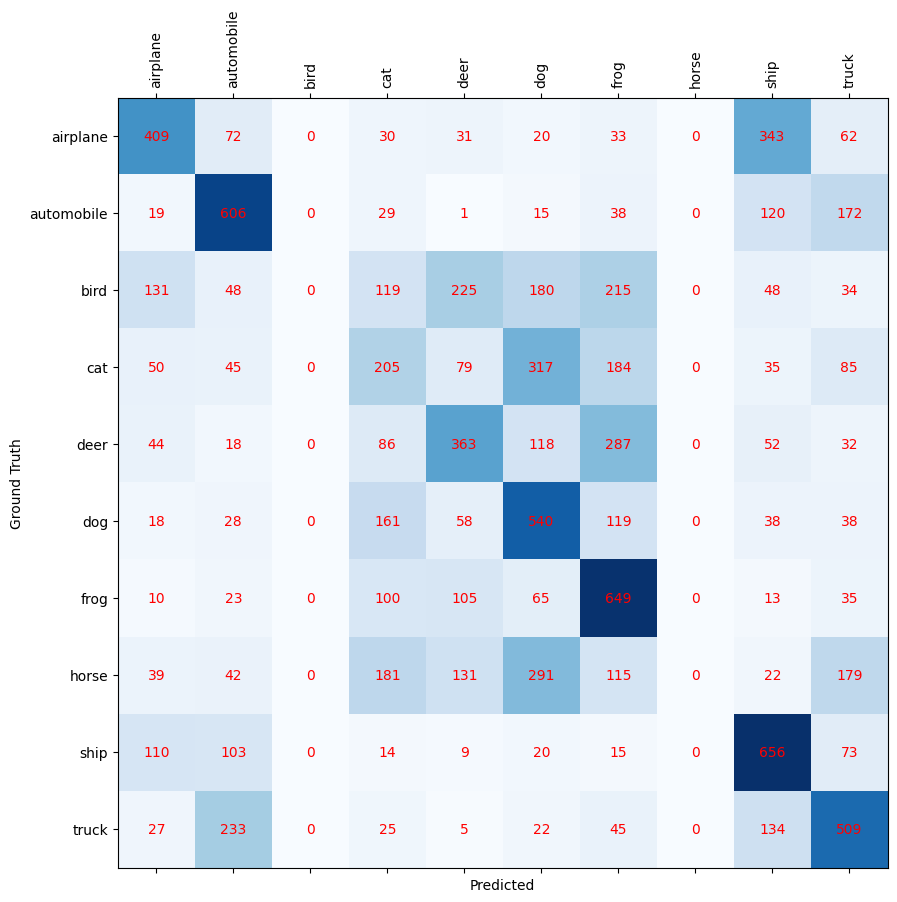

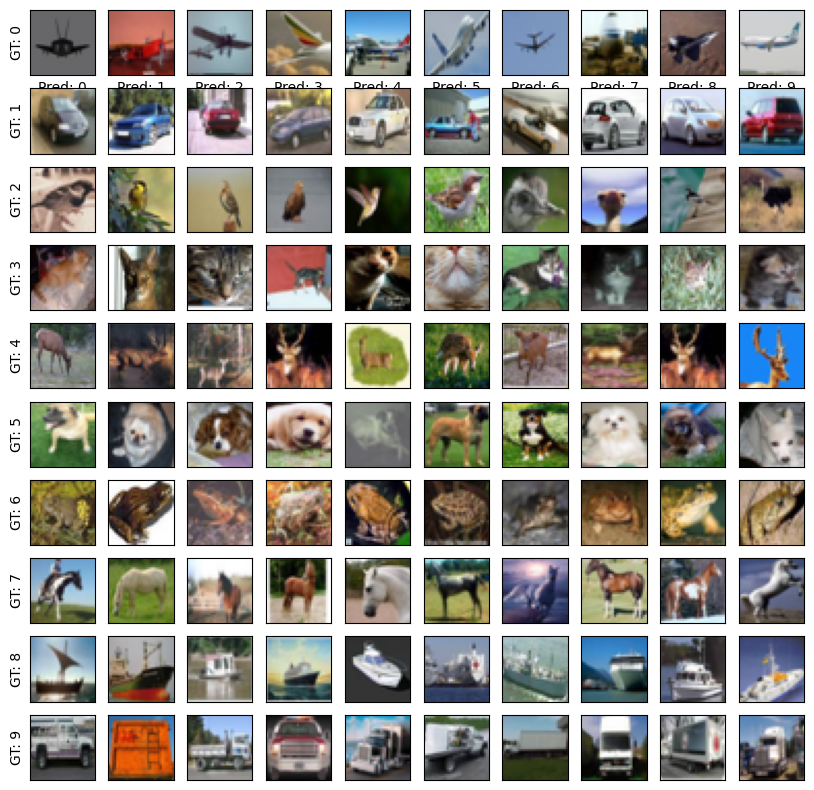

array([[409,  72,   0,  30,  31,  20,  33,   0, 343,  62],
       [ 19, 606,   0,  29,   1,  15,  38,   0, 120, 172],
       [131,  48,   0, 119, 225, 180, 215,   0,  48,  34],
       [ 50,  45,   0, 205,  79, 317, 184,   0,  35,  85],
       [ 44,  18,   0,  86, 363, 118, 287,   0,  52,  32],
       [ 18,  28,   0, 161,  58, 540, 119,   0,  38,  38],
       [ 10,  23,   0, 100, 105,  65, 649,   0,  13,  35],
       [ 39,  42,   0, 181, 131, 291, 115,   0,  22, 179],
       [110, 103,   0,  14,   9,  20,  15,   0, 656,  73],
       [ 27, 233,   0,  25,   5,  22,  45,   0, 134, 509]])

In [28]:
_, acc1, _, _, f11 = draw_confusion_matrix(net1, test_loader)
_, acc2, _, _, f12 = draw_confusion_matrix(net2, test_loader)

In [29]:
# torch.cuda.empty_cache()

# Q5: Fine-tune ResNet18 model trained on ImageNet for CIFAR10 dataset.

In [ ]:
#finetuning here
# feature extactor ----> classifier
class ModifiedResNet(nn.Module):
    def __init__(self, original_model):
        super(ModifiedResNet, self).__init__()
        # copy the NN architecture from the original ResNet model
        self.features = nn.Sequential(*list(original_model.children())[:-2])
        # add a new classifier
        self.classifier = nn.Linear(512, 10)

    def forward(self, x):
        # obtain the feature representation
        representation = self.features(x)
        # forward
        output = self.classifier(representation.view(-1, 512))
        return output, representation

net3 = ModifiedResNet(models.resnet18(pretrained=True)).to(device)
#freezing the network (backbone)
for params in net3.features.parameters():
    # this only freezes the backbone
    params.requires_grad = False


# for name, params in net.named_parameters():
#   print(name, params.requires_grad)

# modify the forward function, output both the code and the feature map (codes, features)
# summary(net3, (3, 32, 32))

In [ ]:
# training classifier
net3 = net3.to(device)

lr = 0.01
momentum = 0.5
num_epochs = 5

opt = torch.optim.Adam(net3.parameters(), lr=lr)
ls = []
for i in range(num_epochs):
    total_loss = 0
    t=time.time()
    for batch in train_loader:
        X, y = batch[0].to(device), batch[1].to(device)
        logits = net3(X)[0]
        loss = F.cross_entropy(logits, y)
        opt.zero_grad()
        loss.backward()
        opt.step()
        total_loss+=loss.item()

    ls.append(total_loss)
    print("Epoch: ", i, "Loss: ", total_loss/len(train_loader), "Time: ", time.time()-t)

plt.plot(ls)

In [ ]:
#unfreezing
for params in net3.features.parameters():
    params.requires_grad = True
# fine-tuning the whole network
lr = 0.01
momentum = 0.5
num_epochs = 10

opt = torch.optim.Adam(net3.parameters(), lr = lr)
ls = []
for i in range(num_epochs):
  total_loss = 0
  t=time.time()
  for batch in train_loader:
    X, y = batch[0].to(device), batch[1].to(device)
    logits = net3(X)[0]
    loss = F.cross_entropy(logits, y)
    opt.zero_grad()
    loss.backward()
    opt.step()
    total_loss+=loss.item()

  ls.append(total_loss/len(train_loader))
  print("Epoch: ", i, "Loss: ", total_loss/len(train_loader), "Time: ", time.time()-t)

plt.plot(ls)

In [ ]:
_, acc3, _, _, f13 = draw_confusion_matrix(net3, test_loader)

# Q6:Compare the accuarcay of simple CNN and ResNet18 model on the test set

I will compare the performance of two models using two criterion:
1. the accuracy of the model on the test set, including accuracy, precision, recall, and F1 score. A confusion matrix will be drawn to visualize the performance of the model.(And A correct/fail example will be given)
2. The visualizatio of representaiton space using t-SNE.

## Representation
For computational efficiency, here only use 10 first batch for visualization.

In [7]:
def t_SNE_vis(net, loader):
    from sklearn.manifold import TSNE
    # draws t-SNE visualization for the model
    representation = []
    lables = []
    for vis_idx, batch in enumerate(loader):
        X, Y = batch[0].to(device), batch[1].to(device)
        code = net(X)[-1].cpu().detach().numpy()
        Y = Y.cpu().detach().numpy()
        representation.append(code)
        lables.append(Y)
        if vis_idx>=9:
          break

    representation = np.vstack(representation)
    lables = np.hstack(lables)
    print(representation.shape, lables.shape) # debugging
    representation = TSNE(n_components=2).fit_transform(representation.reshape(representation.shape[0], -1))

    plt.figure(figsize=(10,10))
    for i in range(10):
        idx = np.where(lables==i)[0]
        plt.scatter(representation[idx,0], representation[idx,1], label=i)
    plt.legend()
    plt.show()
        

In [ ]:
t_SNE_vis(net1, test_loader)
t_SNE_vis(net2, test_loader)
t_SNE_vis(net3, test_loader)

## Performance
Calculate the performance of fine-tuned model, the other two has been already calculated.

In [ ]:
import pandas as pd
table = pd.DataFrame({'Simple NN':[acc1, f11], '2-layer CNN':[acc2, f12], 'ResNet18':[acc3, f13]}, index=['Accuracy', 'F1 score'])
table